In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("vgg_5y_activation.csv.gz", index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.142803,0.400475,0.134664,0.075232,0.161829,0.335772,0.034391,0.178221,0.228338,0.079080,...,0.218878,0.476947,0.042160,0.302460,0.281130,0.048943,0.092393,0.308245,0.176064,0.020658
1,0.153040,0.369468,0.343546,0.159964,0.177989,0.296884,0.026182,0.111398,0.232975,0.071310,...,0.136407,0.148069,0.051981,0.146548,0.241734,0.123167,0.069215,0.228878,0.172204,0.022260
2,0.105058,0.218708,0.427899,0.148000,0.038263,0.384796,0.042876,0.116903,0.126105,0.052608,...,0.233396,0.153381,0.012768,0.152117,0.134829,0.057846,0.071152,0.054373,0.067675,0.016740
3,0.126020,0.440626,0.223603,0.133866,0.113369,0.259057,0.200247,0.128830,0.304532,0.143829,...,0.191846,0.366552,0.021012,0.415277,0.288085,0.273792,0.198327,0.299434,0.222212,0.117026
4,0.158089,0.062936,0.228385,0.224262,0.195025,0.133689,0.054723,0.104017,0.008573,0.202741,...,0.084686,0.025523,0.125536,0.059776,0.009763,0.124605,0.063370,0.249394,0.058870,0.029997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50247,0.024017,0.529761,0.392485,0.132199,0.021490,0.708420,0.004376,0.071726,0.014480,0.544205,...,0.359036,0.178483,0.105762,0.381127,0.000000,0.587985,0.079742,0.005765,0.006367,0.017379
50248,0.093362,0.533998,0.405788,0.156721,0.002338,0.579458,0.044787,0.176960,0.009811,0.499926,...,0.436967,0.315911,0.208208,0.438174,0.037188,0.589422,0.043713,0.023868,0.026106,0.019453
50249,0.014703,0.549547,0.378694,0.142741,0.018892,0.649889,0.018734,0.098782,0.029179,0.936829,...,0.336168,0.285051,0.175838,0.394663,0.037916,0.547642,0.040543,0.025586,0.012245,0.010893
50250,0.130718,0.577925,0.353213,0.089060,0.038444,0.597074,0.022201,0.076431,0.010245,0.433426,...,0.380023,0.363626,0.118584,0.550806,0.023213,0.756092,0.035423,0.017822,0.040728,0.006346


신경망 출력값의 범위

<AxesSubplot:ylabel='Density'>

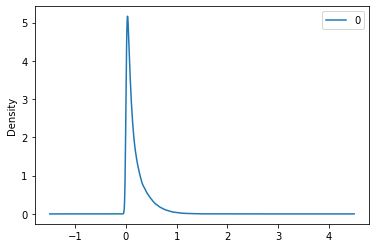

In [3]:
flatten = pd.DataFrame(df.to_numpy().reshape(-1))
flatten.sample(frac=0.01, random_state=1106).plot.kde()

In [4]:
flatten.describe()

,0
count,2.572902e+07
mean,1.856991e-01
std,2.032684e-01
min,0.000000e+00
25%,4.580271e-02
50%,1.127506e-01
75%,2.544299e-01
max,4.511184e+00


바이클러스터링 군집 수 결정

In [5]:
from sklearn.cluster import MiniBatchKMeans

In [6]:
clust = MiniBatchKMeans(
    n_clusters=30, batch_size=100, verbose=0, random_state=1106,
).fit(df)

clust.inertia_

249567.31977586384

In [7]:
inertia_dict = {
    i: MiniBatchKMeans(n_clusters=i, random_state=1106,).fit(df).inertia_
    for i in range(2, 31)
}

In [8]:
inertia_dict

{2: 546178.1986069791,
 3: 464805.80959747697,
 4: 412207.11184456217,
 5: 383727.88962536864,
 6: 381051.23471486126,
 7: 363963.0413326293,
 8: 336105.897181764,
 9: 335850.23782929545,
 10: 320455.41851875593,
 11: 317763.65472776874,
 12: 316941.13864937006,
 13: 297984.5873021456,
 14: 295283.74958088406,
 15: 301581.77049479476,
 16: 287771.2844192811,
 17: 283543.59737378487,
 18: 280403.99681494106,
 19: 277395.08939560945,
 20: 274496.4316501604,
 21: 267349.84685781586,
 22: 264978.7881748365,
 23: 262641.5707076779,
 24: 261800.3182810875,
 25: 261318.0972012315,
 26: 257632.69368961337,
 27: 255627.06538646604,
 28: 253206.94315814826,
 29: 251818.27031600522,
 30: 249567.31977586384}

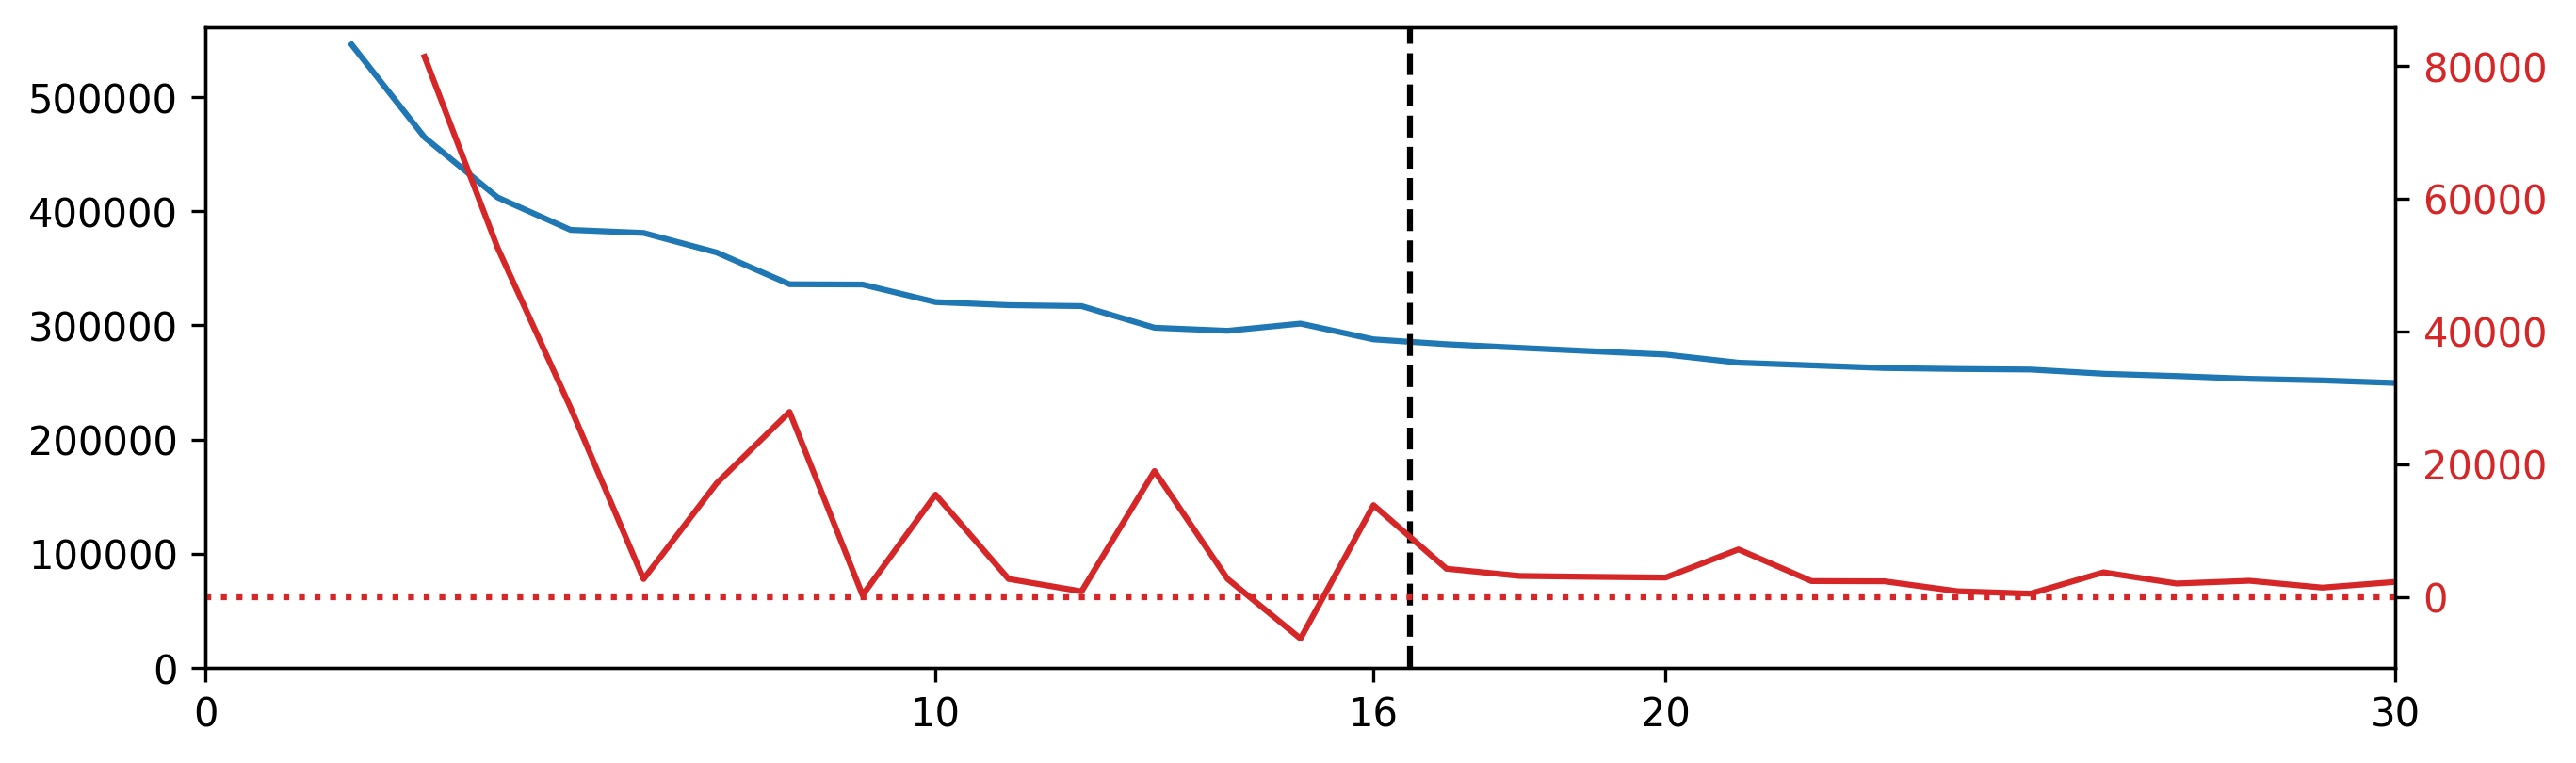

In [293]:
fig = plt.figure(figsize=(10, 3), dpi=300)

ax = pd.Series(inertia_dict).plot()
ax.set_xlim(0, 30)
ax.set_ylim(0)

ax2 = ax.twinx()
(pd.Series(inertia_dict).diff() * (-1)).plot(c="tab:red", ax=ax2)
# ax2.set_ylim(0)
ax2.axhline(0, c="tab:red", ls=":")
ax2.tick_params(axis="y", labelcolor="tab:red")

n_clusters = 16  # <-------------------------

[ax.axvline(n + 0.5, c="k", ls="--") for n in [n_clusters]]
ax.set_xticks(list(range(0, 30 + 1, 10)) + [n_clusters])

plt.show()
fig.savefig("biclust_n.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_n.pdf", bbox_inches="tight", pad_inches=0)

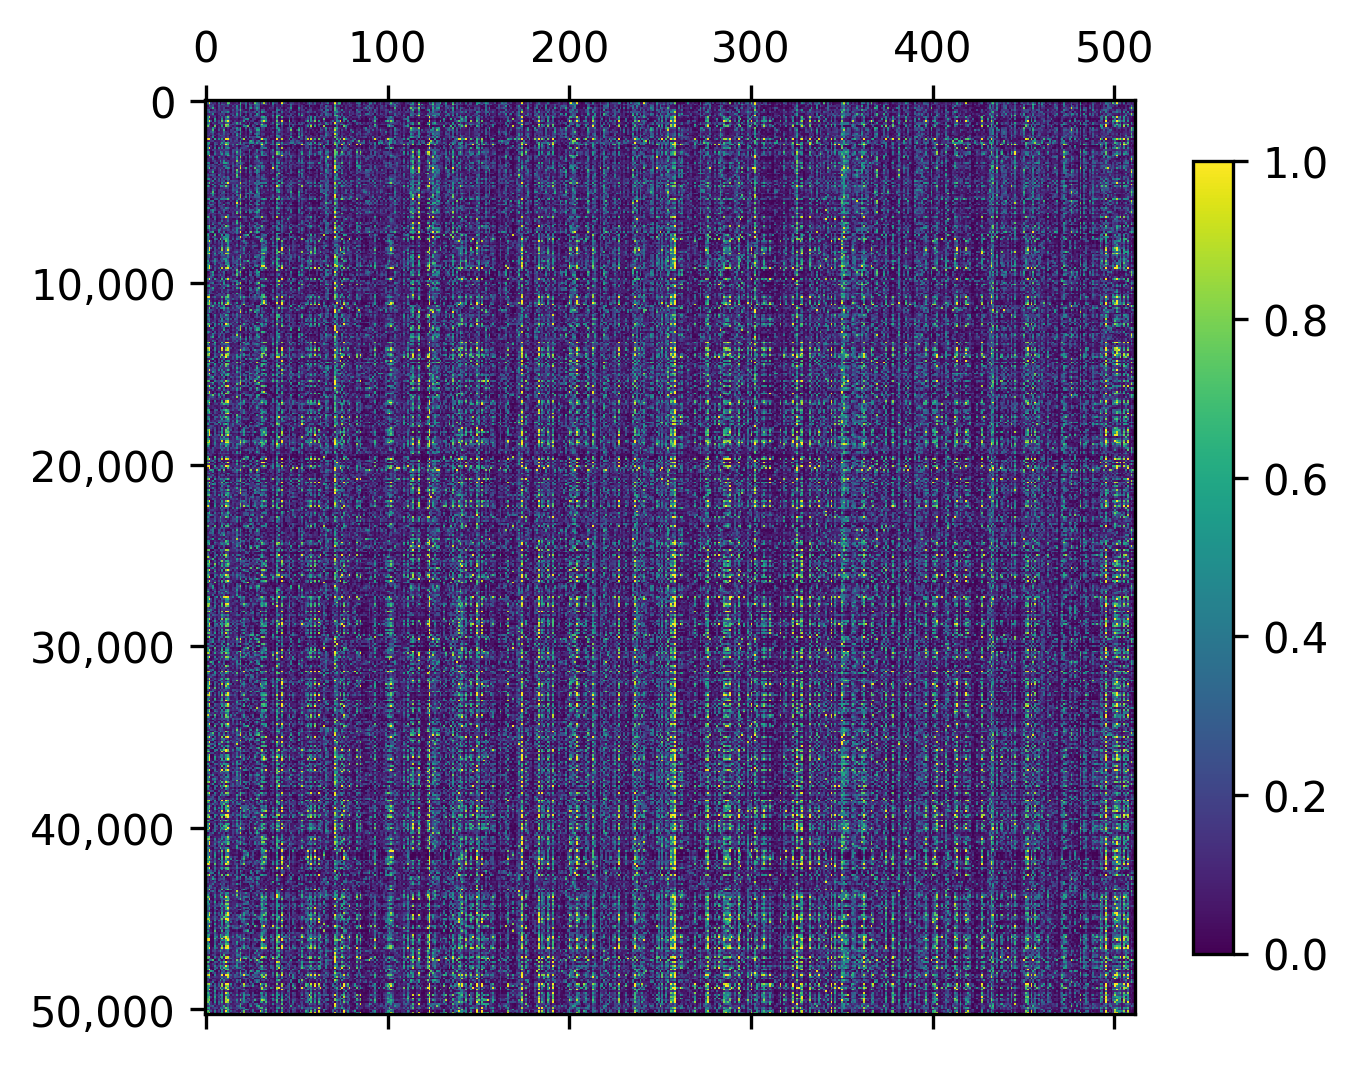

In [12]:
import matplotlib.colors as colors

fig = plt.figure(figsize=(5, 7), dpi=300)
ax = fig.gca()

im = ax.matshow(df[::100], vmin=0, vmax=1, cmap="viridis",)

ax.set_yticks(range(0, 500 + 1, 100))
ax.set_yticklabels([f"{t:,}" for t in range(0, 50000 + 1, 10000)])

fig.colorbar(im, shrink=0.5)

plt.show()
fig.savefig("biclust_before.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_before.pdf", bbox_inches="tight", pad_inches=0)

In [13]:
df_refined = pd.read_csv("fp_refined.csv")
df_refined

,id_after,Path,index,APT_ID,Date,year,norm_year,yyyymm,N_Housings,Max_Floors,...,sido_cluster_code,sido_sgg_name,FP_ID,Area,norm_log_area,area_85,Entrance,Rooms,Baths,N_Units
0,8928_160,/data/fp_img_processed/8928_160.png,1,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,160,134.30,1.313282,False,계단식,4,2,84
1,8928_183,/data/fp_img_processed/8928_183.png,2,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,183,153.80,1.702528,False,계단식,4,2,44
2,8928_201A,/data/fp_img_processed/8928_201A.png,3,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,201A,170.32,1.995448,False,계단식,4,2,42
3,8928_204B,/data/fp_img_processed/8928_204B.png,4,8928,2004-06-01T00:00:00Z,2004,0.70,200406,212,22,...,0,서울시 강남구,204B,168.42,1.963240,False,계단식,4,2,42
4,960_35,/data/fp_img_processed/960_35.png,5,960,1982-11-01T00:00:00Z,1982,0.26,198211,5040,5,...,0,서울시 강남구,35,35.64,-2.495452,False,계단식,2,1,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50535,115454_21D,/data/fp_img_processed/115454_21D.png,50577,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,21D,14.50,-5.077429,False,계단식,2,1,20
50536,115454_34E,/data/fp_img_processed/115454_34E.png,50578,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,34E,21.57,-3.937185,False,계단식,2,1,4
50537,115454_36B,/data/fp_img_processed/115454_36B.png,50579,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,36B,24.86,-3.529623,False,계단식,3,2,16
50538,115454_37A,/data/fp_img_processed/115454_37A.png,50580,115454,2017-03-01T00:00:00Z,2017,0.96,201703,72,4,...,8,제주도 제주시,37A,25.67,-3.437569,False,계단식,3,2,24


In [14]:
df_vgg = pd.read_csv("vgg_5y_prediction.csv")

In [294]:
df_clust = df_vgg.join(
    df_refined.set_index("id_after")[
        ["year", "sido_cluster_code", "Area", "Rooms", "Baths"]
    ],
    on="ID",
)
df_clust

,Unnamed: 0,ID,true,prediction,year,sido_cluster_code,Area,Rooms,Baths
0,0,8928_160,6,6,2004,0,134.30,4,2
1,1,8928_183,6,6,2004,0,153.80,4,2
2,2,8928_201A,6,7,2004,0,170.32,4,2
3,3,8928_204B,6,6,2004,0,168.42,4,2
4,4,960_35,2,4,1982,0,35.64,2,1
...,...,...,...,...,...,...,...,...,...
50247,50247,115454_21D,9,9,2017,8,14.50,2,1
50248,50248,115454_34E,9,9,2017,8,21.57,2,1
50249,50249,115454_36B,9,9,2017,8,24.86,3,2
50250,50250,115454_37A,9,9,2017,8,25.67,3,2


In [295]:
n_clusters = 16

In [296]:
from sklearn.cluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=n_clusters, random_state=1106, n_jobs=6).fit(df)

df_clust["cluster"] = model.row_labels_
order = df_clust.groupby("cluster")["year"].mean().argsort().values
rank = order.argsort()
df_clust["cluster"] = rank[df_clust.cluster]

df_clust.groupby("cluster").year.mean()

cluster
0     1989.393474
1     1992.392665
2     1993.255710
3     1996.476559
4     1997.418820
5     1999.558077
6     1999.951660
7     2004.447824
8     2005.645885
9     2005.872827
10    2006.108202
11    2008.871081
12    2009.663137
13    2010.950501
14    2012.293841
15    2014.261751
Name: year, dtype: float64

(0.0, 0.19153032308769902)

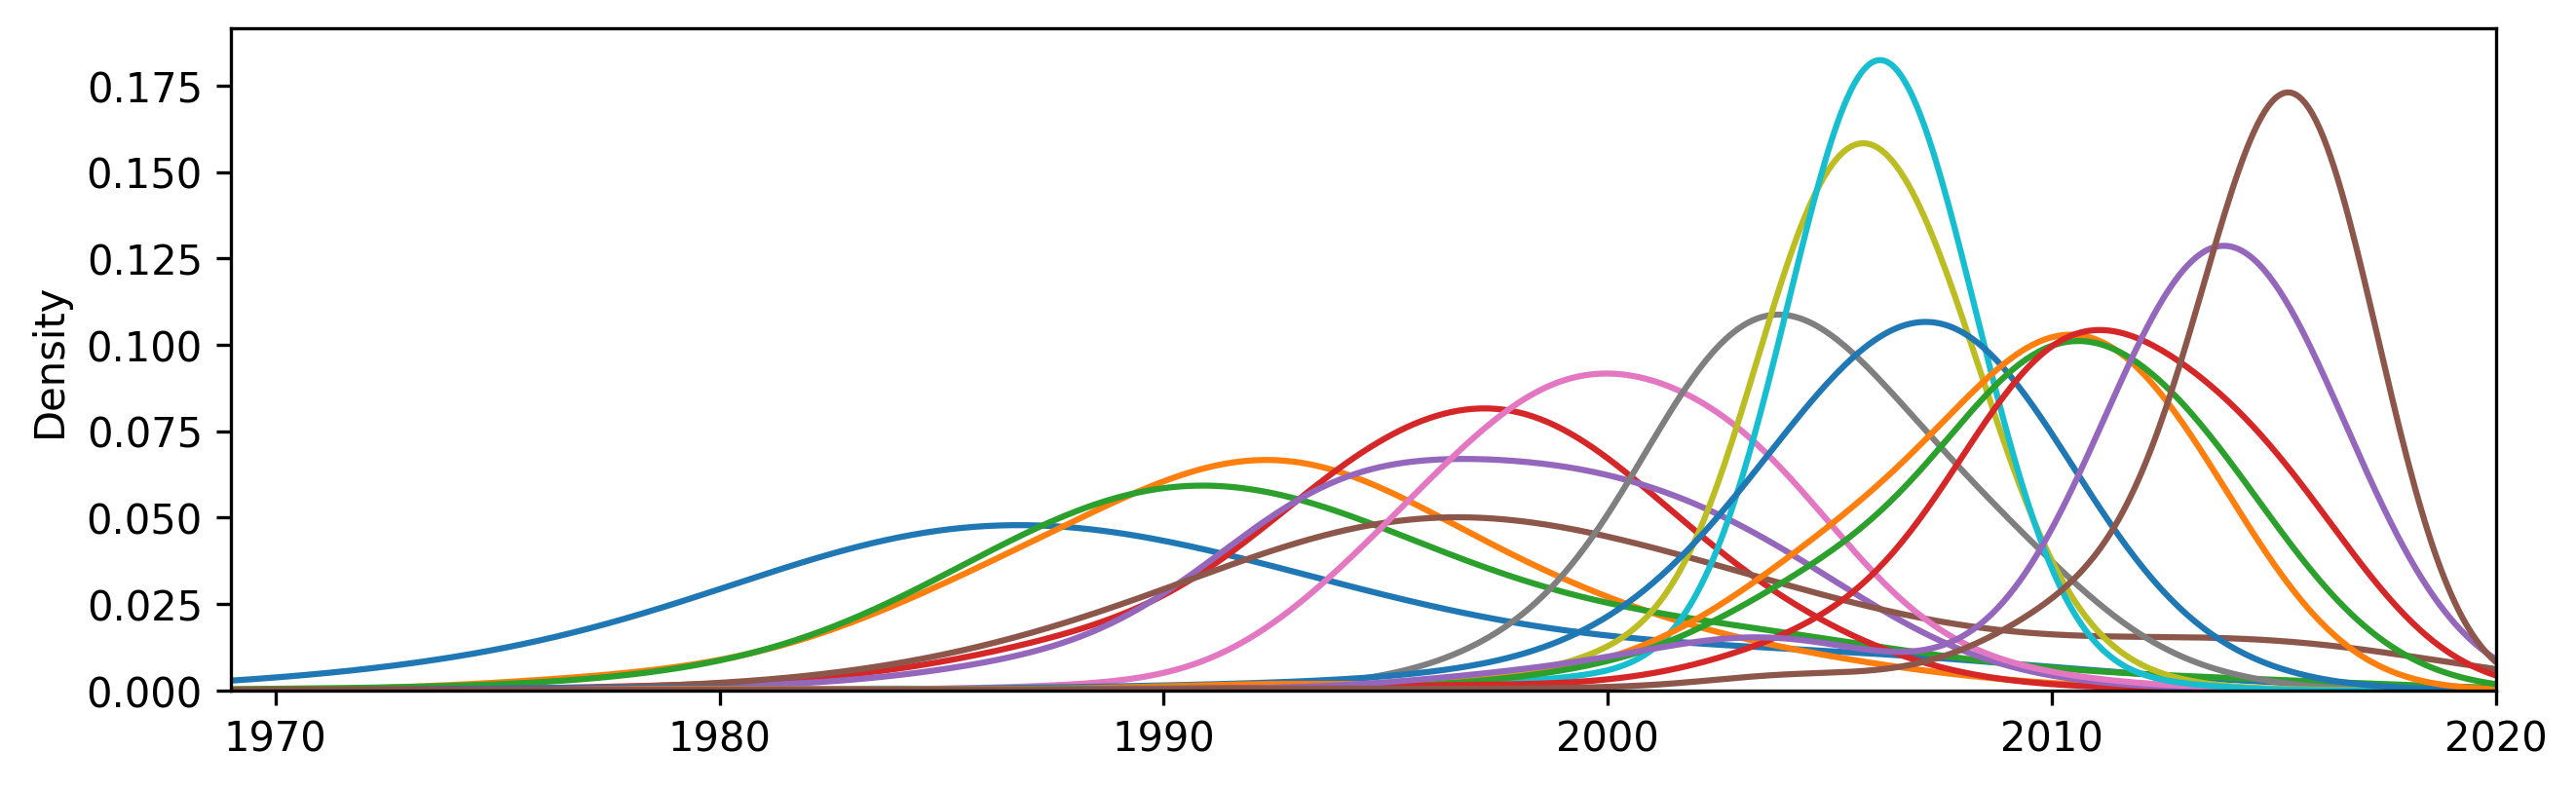

In [297]:
fig = plt.figure(figsize=(10, 3), dpi=300)

axs = df_clust.groupby("cluster")["year"].plot.kde(bw_method=0.5)
axs[0].set_xlim(1969, 2020)
axs[0].set_ylim(0)

# plt.legend()

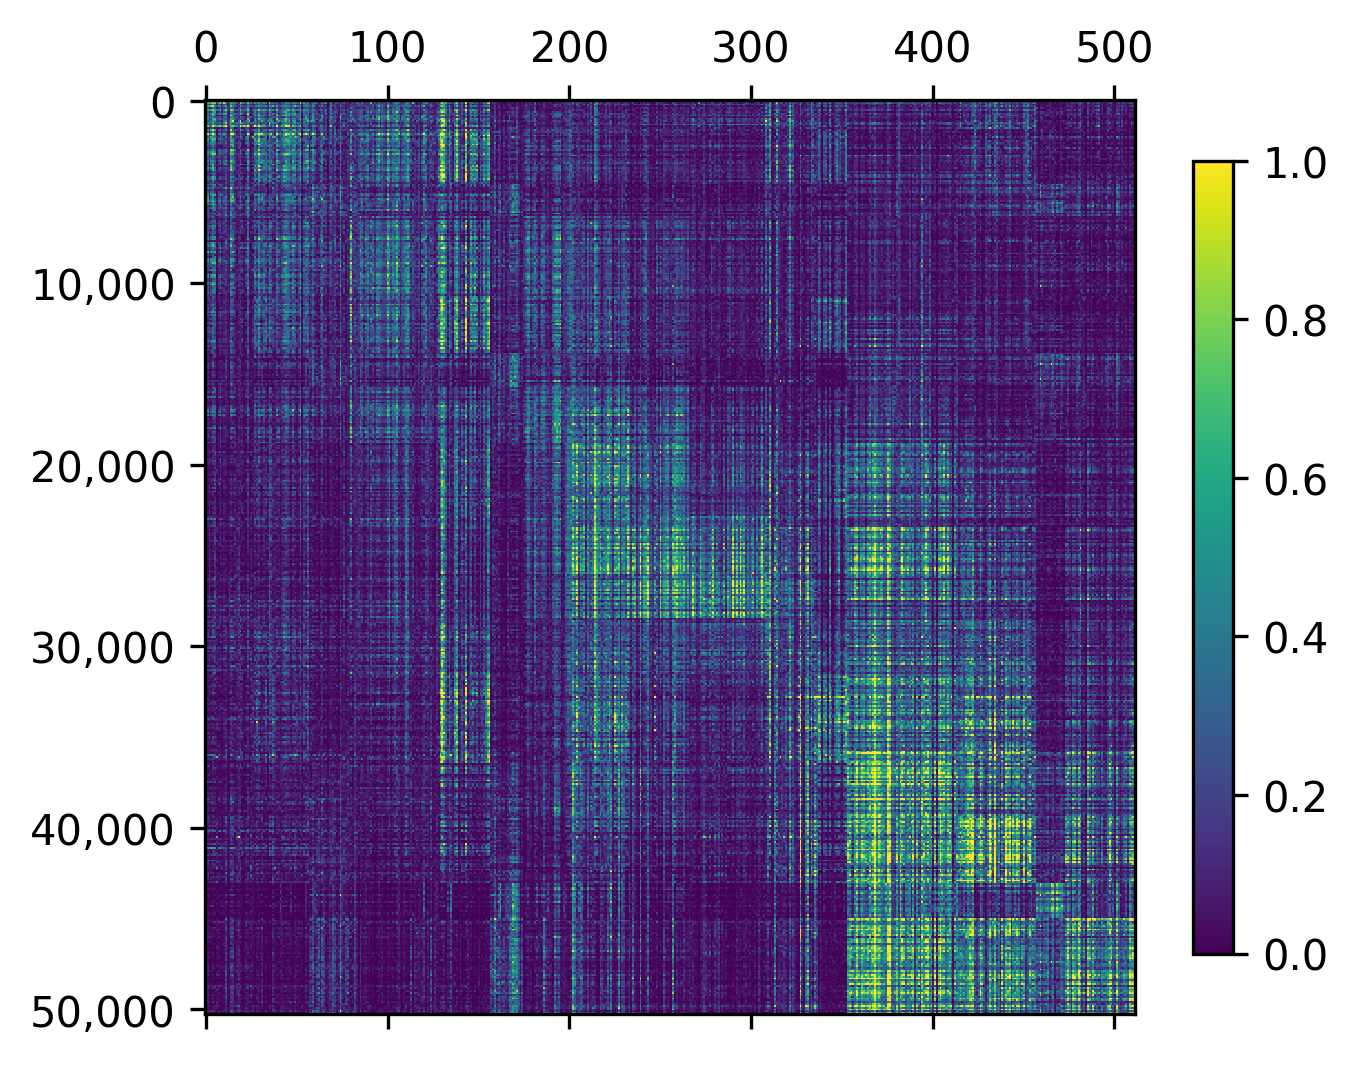

In [300]:
ordered = df.iloc[
    np.argsort(rank[model.row_labels_]), np.argsort(rank[model.column_labels_])
]

fig = plt.figure(figsize=(5, 7), dpi=300)
ax = fig.gca()

im = ax.matshow(ordered[::100], vmin=0, vmax=1, cmap="viridis")

ax.set_yticks(range(0, 500 + 1, 100))
ax.set_yticklabels([f"{t:,}" for t in range(0, 50000 + 1, 10000)])

fig.colorbar(im, shrink=0.5)

plt.show()
fig.savefig("biclust_after.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_after.pdf", bbox_inches="tight", pad_inches=0)

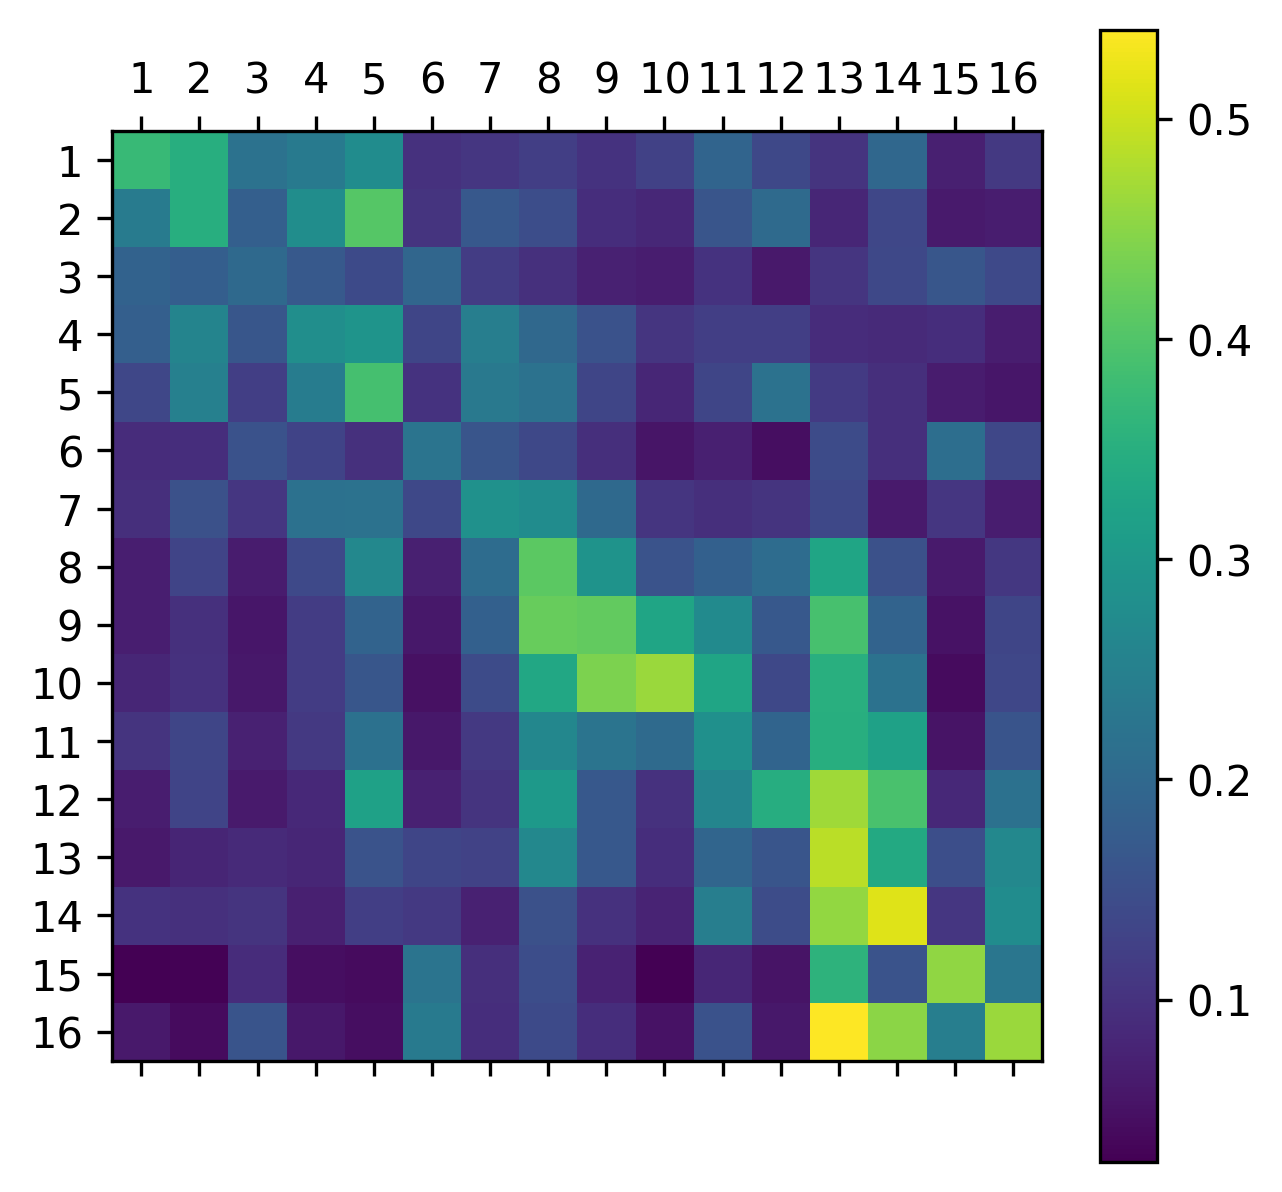

In [301]:
df_mean = (
    df.groupby(df_clust["cluster"])
    .mean()
    .groupby(rank[model.column_labels_], axis=1)
    .mean()
)

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

im = ax.matshow(df_mean)
fig.colorbar(im)

ax.set_xticks(range(n_clusters))
ax.set_yticks(range(n_clusters))

ax.set_xticklabels(range(1, n_clusters + 1))
ax.set_yticklabels(range(1, n_clusters + 1))

plt.show()
fig.savefig("biclust_mean.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_mean.pdf", bbox_inches="tight", pad_inches=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  # This is added back by InteractiveShellApp.init_path()


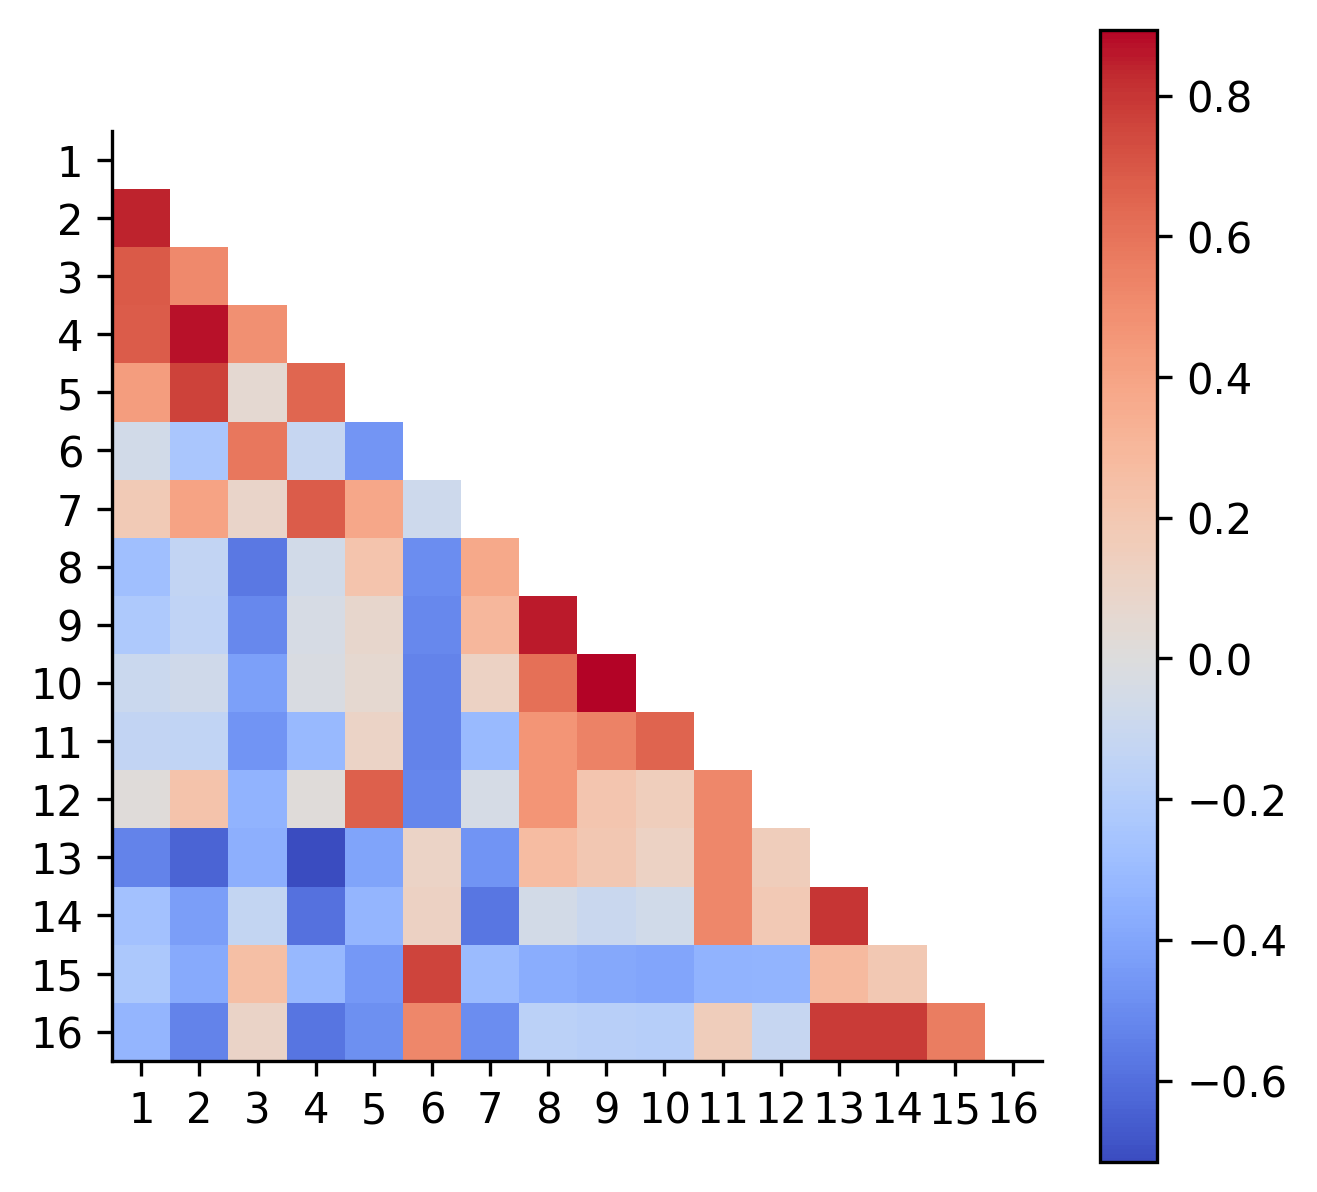

In [465]:
from matplotlib.colors import DivergingNorm

df_corr = df.groupby(rank[model.column_labels_], axis=1).sum().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()
im = ax.matshow(
    np.ma.array(df_corr, mask=mask), cmap="coolwarm", norm=DivergingNorm(0),
)

fig.colorbar(im)

# Hide the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.tick_bottom()

ax.set_xticks(range(n_clusters))
ax.set_yticks(range(n_clusters))

ax.set_xticklabels(range(1, n_clusters + 1))
ax.set_yticklabels(range(1, n_clusters + 1))

plt.show()
fig.savefig("biclust_corr.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_corr.pdf", bbox_inches="tight", pad_inches=0)

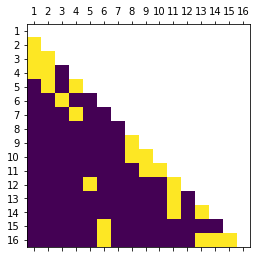

In [488]:
plt.matshow(np.ma.array((df_corr >= 0.5), mask=mask))

ax = plt.gca()
ax.set_xticks(range(n_clusters))
ax.set_yticks(range(n_clusters))

ax.set_xticklabels(range(1, n_clusters + 1))
ax.set_yticklabels(range(1, n_clusters + 1))

plt.show()

1번부터 16번까지의 평면 계획 특성 요인은 각 요인과 짝지어져 군집화된 평면들의 평균 준공연도를 기준으로 정렬한 것이다.
인접한? 요인들은 서로 비슷한 시기의 평면 계획 특성을 나타낸다.
각 시기에 해당하는 평면에서는 해당 시기의 여러 계획 특성이 함께 나타나기 때문에,
서로 인접한 평면 계획 특성 요인들끼리는 양의 상관관계를 보인다.

5와 12, 6과 15는 서로 다른 시기의 평면에서 나타나는 계획 특성 요인이지만 양의 상관관계를 보인다.
대부분의 요인이 서로 상관관계가 없거나 음의 상관관계를 보이는 것과 다르다.
해당 평면 군집 사이에 계획적 공통점이 있다는 점을 시사한다.

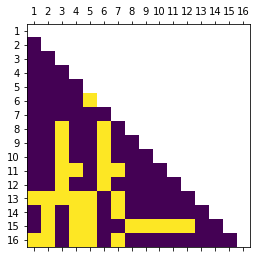

In [498]:
plt.matshow(np.ma.array(df_corr <= -0.3, mask=mask),)

ax = plt.gca()
ax.set_xticks(range(n_clusters))
ax.set_yticks(range(n_clusters))

ax.set_xticklabels(range(1, n_clusters + 1))
ax.set_yticklabels(range(1, n_clusters + 1))

plt.show()

1990년대 평면을 포괄하는 1--7번 요인과
2010년대 평면을 포괄하는 13--16번 요인 사이에서는
대다수에서 역의 상관관계가 두드러진다.
딥 러닝 모형이 학습한 1990년대와 2010년대의 평면 계획 특성은
서로 다른 시기의 계획 특성을 잘 구분할 수 있다.

한편, 
3, 6, 15번 요인은 
2000년대 평면을 포함하는 8--12번 요인과 역의 상관관계를 보인다.
2000년대 평면에서 잘 나타나지 않았던 계획 경향을 나타낸다.

In [305]:
rank[model.column_labels_]

array([ 0, 12, 13,  2,  3, 12,  9,  3,  8, 12,  9, 12, 13, 11, 15,  7, 12,
        6, 10,  4, 13, 12,  4, 14,  4,  0, 15, 11,  1,  1, 12, 12, 11, 15,
        6,  3,  8, 11, 11,  7,  8,  6, 13,  9,  7,  5, 12,  1, 13,  9,  0,
        3, 10,  8,  9, 15, 13, 11, 12, 10, 15,  8, 12,  8,  4, 14,  7,  4,
        6,  6,  5,  4,  7, 13, 13,  9, 15, 14, 15,  9,  3,  2, 15,  8,  1,
        7,  9,  2,  3,  1,  3, 11,  2, 12,  6,  9,  2,  0,  8, 13, 12, 15,
       13, 13,  1, 10,  0,  3, 10,  7,  4, 12,  2,  4, 10,  3,  6,  4,  9,
        0,  0,  7,  7, 12,  0,  4,  7,  1,  3, 13,  7, 14, 11,  6,  8, 14,
        4, 15,  2, 12,  7, 15,  5, 12,  4,  7, 13,  9,  3, 15,  7, 11, 13,
       10,  4, 11,  3, 13,  8,  8,  2,  1,  9,  1,  1,  1, 15,  2,  5, 14,
        5,  3,  6, 12, 10,  0,  7,  3,  2,  3, 12,  5,  0, 12,  3, 12, 15,
        1, 12,  8,  4, 12,  3,  4,  9,  6,  2,  4,  6, 14, 13, 13,  1,  0,
       13, 12,  9,  8, 15, 10,  4,  3,  2, 12,  6,  2,  0, 12, 15,  3,  2,
       11, 12,  2, 10,  8

In [306]:
np.savetxt("biclust_col.txt", rank[model.column_labels_], "%.u")

In [307]:
df_clust.to_csv("biclust.csv")

In [308]:
pd.crosstab(df_clust.cluster, df_clust.Rooms)

Rooms,1,2,3,4,5,6,7
cluster,,,,,,,
0,4,143,839,421,134,22,0
1,3,229,1617,877,225,21,0
2,46,536,1040,157,15,1,0
3,25,735,2868,696,67,3,0
4,20,303,1924,777,108,3,0
5,201,661,942,43,4,0,0
6,134,611,2084,259,15,0,0
7,16,78,3024,788,136,2,0
8,12,30,2477,612,76,1,0


In [309]:
pd.crosstab(df_clust.cluster, df_clust.Rooms, normalize="index")

Rooms,1,2,3,4,5,6,7
cluster,,,,,,,
0,0.002559,0.091491,0.536788,0.269354,0.085733,0.014075,0.000000
1,0.001009,0.077052,0.544078,0.295087,0.075707,0.007066,0.000000
2,0.025627,0.298607,0.579387,0.087465,0.008357,0.000557,0.000000
3,0.005690,0.167274,0.652708,0.158398,0.015248,0.000683,0.000000
4,0.006380,0.096651,0.613716,0.247847,0.034450,0.000957,0.000000
5,0.108590,0.357104,0.508914,0.023231,0.002161,0.000000,0.000000
6,0.043184,0.196906,0.671608,0.083468,0.004834,0.000000,0.000000
7,0.003956,0.019288,0.747774,0.194857,0.033630,0.000495,0.000000
8,0.003741,0.009352,0.772132,0.190773,0.023691,0.000312,0.000000


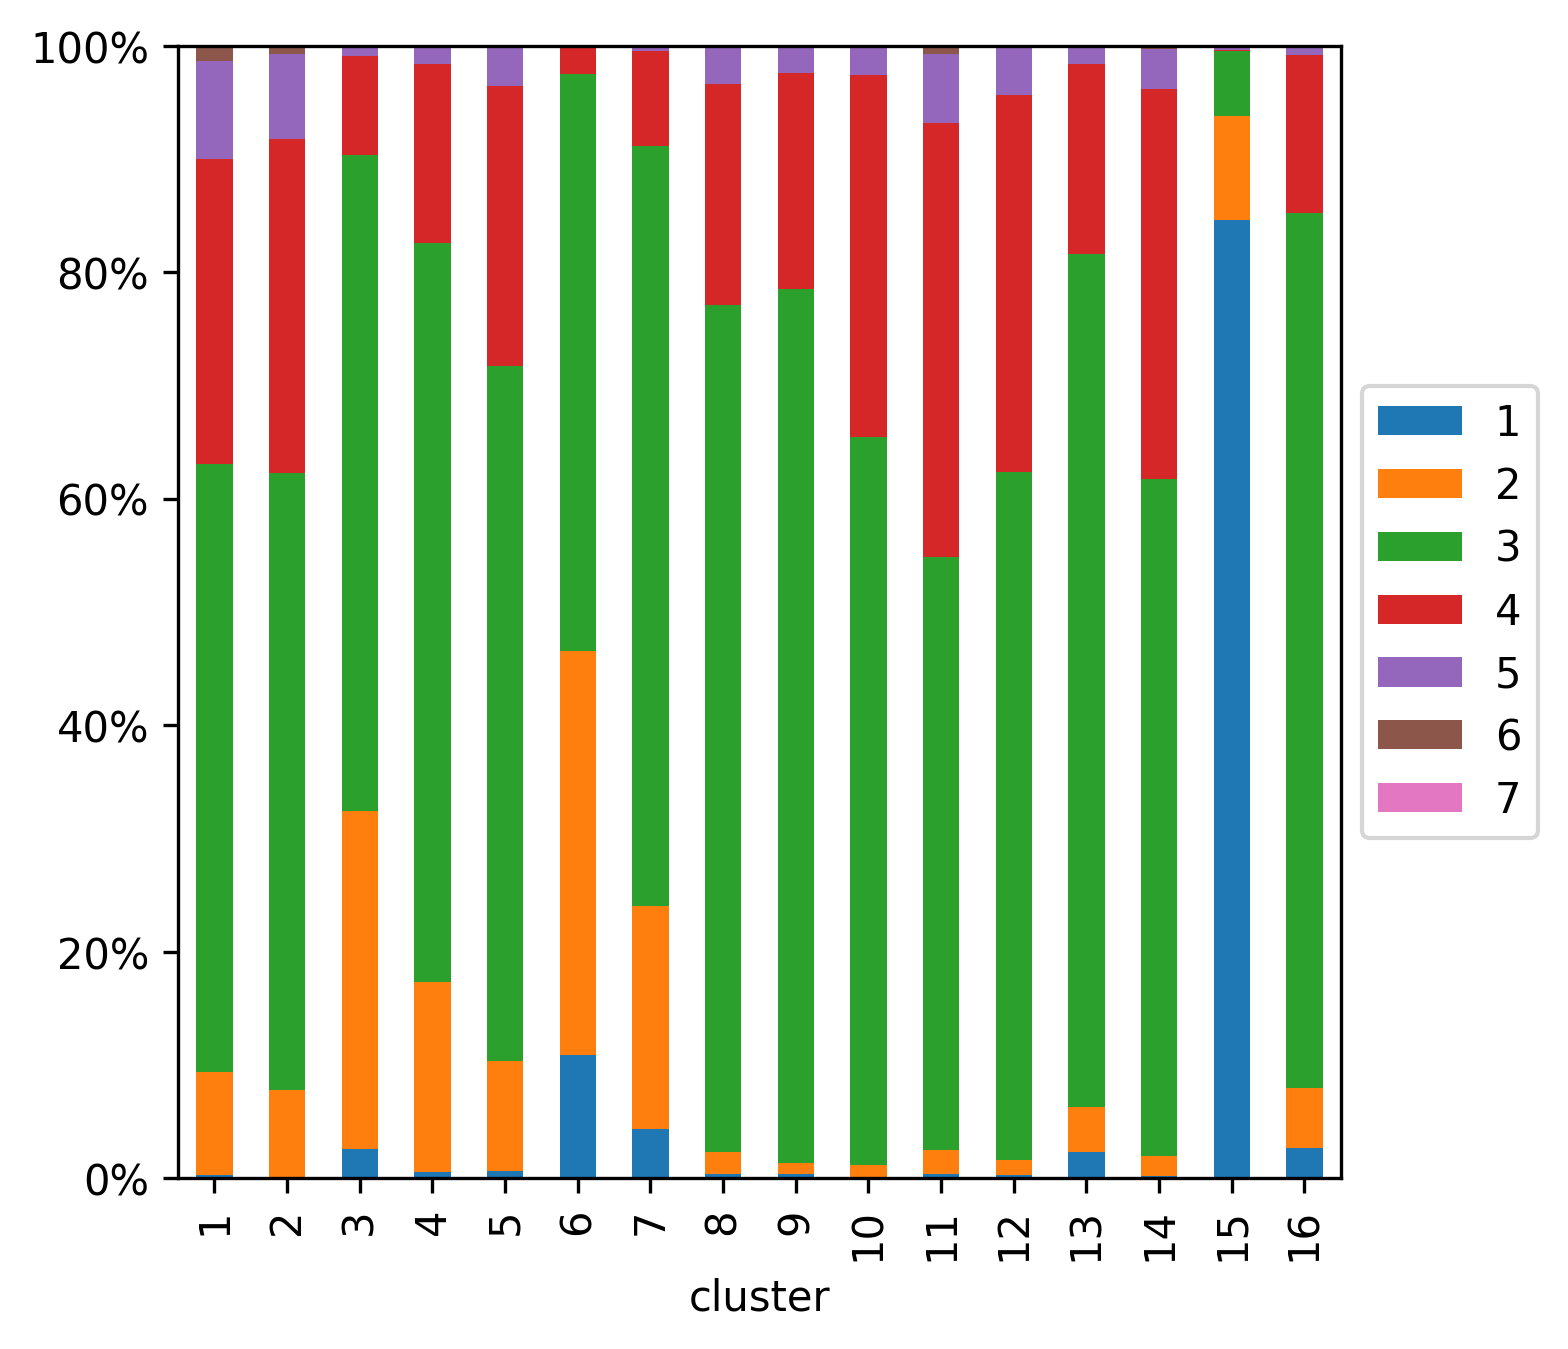

In [360]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.Rooms, normalize="index").plot.bar(
    stacked=True, ax=ax
).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_xticks(range(n_clusters))
ax.set_xticklabels(range(1, n_clusters + 1))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_rooms.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_rooms.pdf", bbox_inches="tight", pad_inches=0)

대부분에서 침실 3개가 가장 많고 그 다음으로 침실 4개가 2위인 것이 일반적.

13번은 침실 1개가 가장 많음.

0, 2번은 침실 3개 다음으로 침실 2개가 뒤따름. (2위)

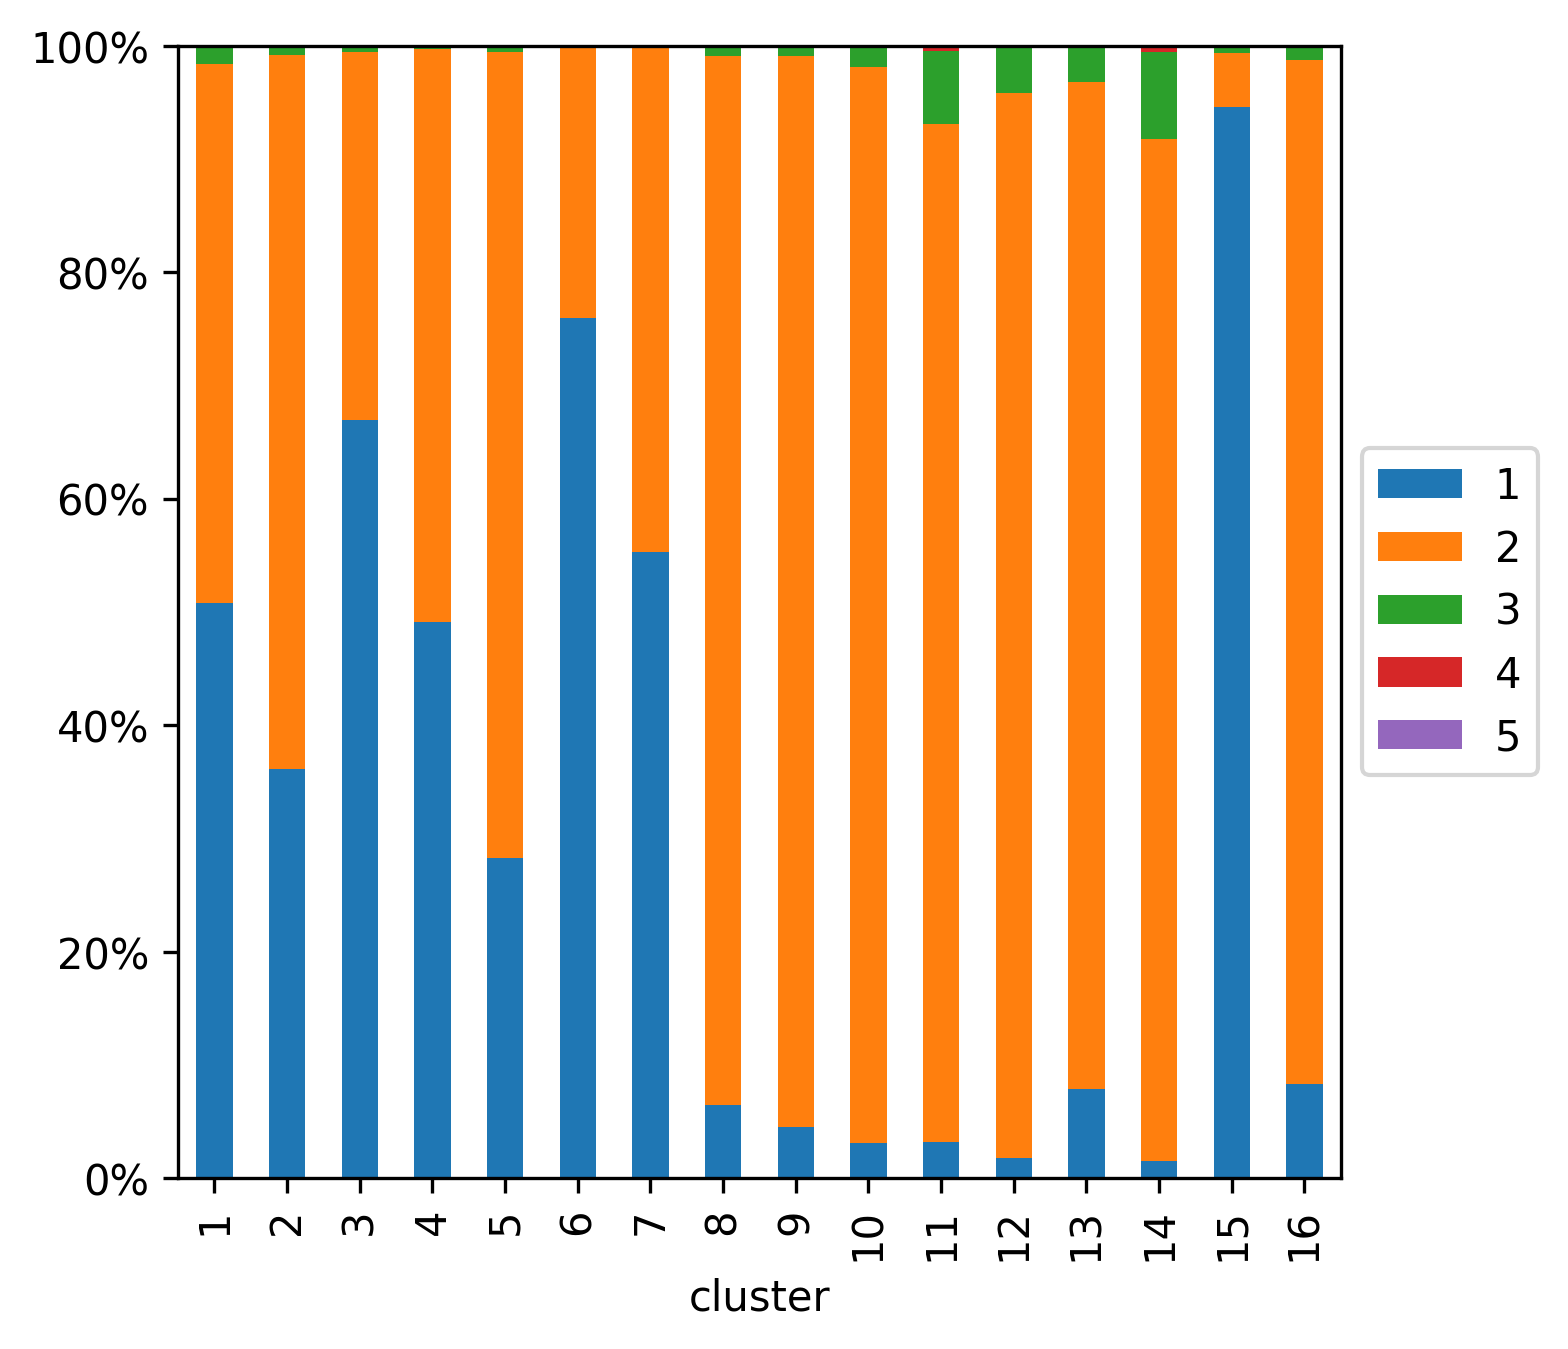

In [361]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.Baths, normalize="index").plot.bar(
    stacked=True, ax=ax
).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_xticks(range(n_clusters))
ax.set_xticklabels(range(1, n_clusters + 1))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_baths.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_baths.pdf", bbox_inches="tight", pad_inches=0)

대체로 화장실 2개가 가장 많지만,
침실 1개가 가장 많은 13번과
침실 2개가 2위인 0, 2번은
화장실 1개가 가장 많음.

In [312]:
cmap = plt.get_cmap("tab20")
colors = cmap(np.linspace(0, 0.5 - 1 / cmap.N, cmap.N // 2))
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.68235294, 0.78039216, 0.90980392, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [1.        , 0.73333333, 0.47058824, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.59607843, 0.8745098 , 0.54117647, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [1.        , 0.59607843, 0.58823529, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.77254902, 0.69019608, 0.83529412, 1.        ]])

In [313]:
from matplotlib.colors import LinearSegmentedColormap

tab20half = LinearSegmentedColormap.from_list("tab20 Lower Half", colors)

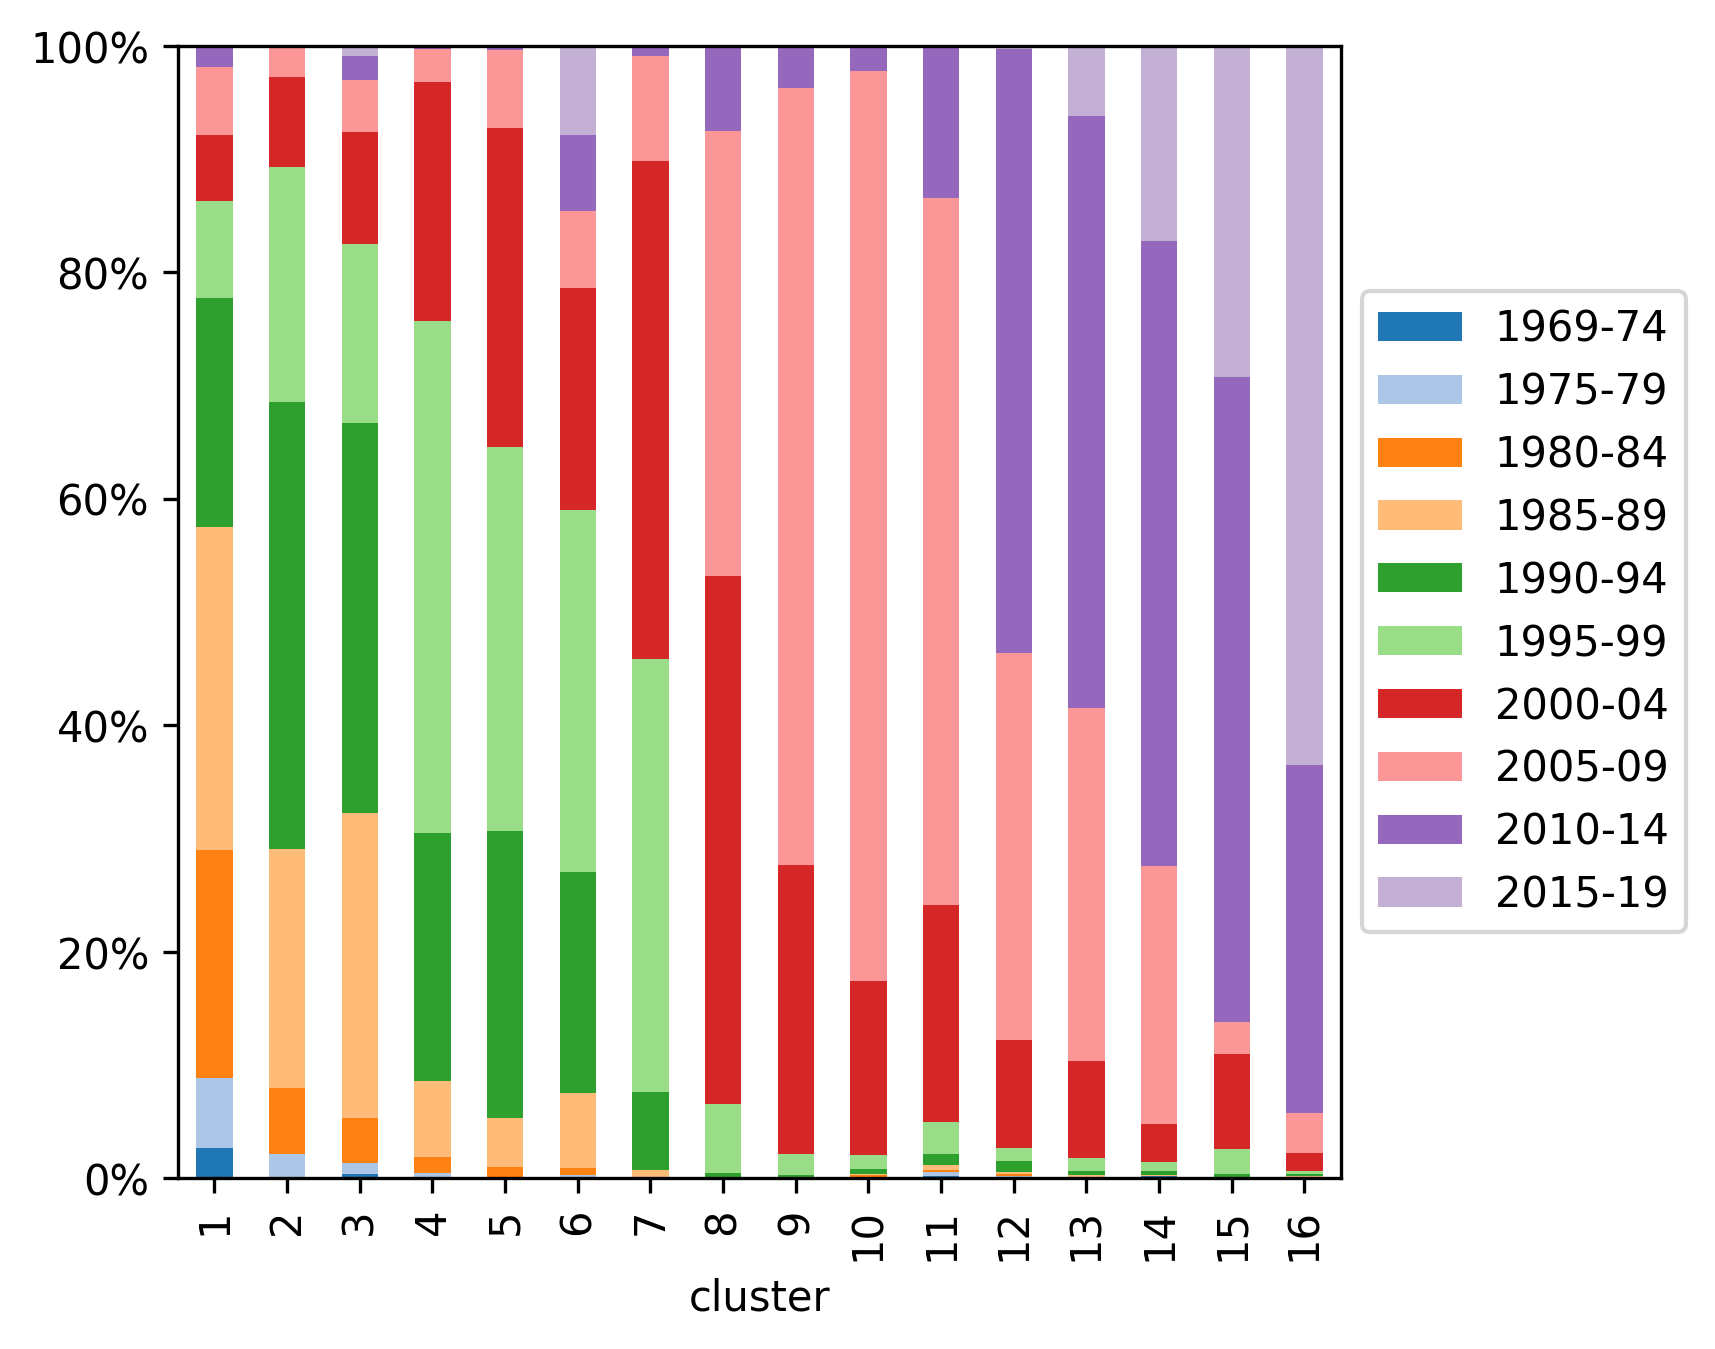

In [362]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.true, normalize="index").plot.bar(
    stacked=True, cmap=tab20half, ax=ax
).legend(
    [
        "1969-74",
        "1975-79",
        "1980-84",
        "1985-89",
        "1990-94",
        "1995-99",
        "2000-04",
        "2005-09",
        "2010-14",
        "2015-19",
    ],
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)

ax.set_xticks(range(n_clusters))
ax.set_xticklabels(range(1, n_clusters + 1))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_year.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_year.pdf", bbox_inches="tight", pad_inches=0)

각 군집이 서로 다른 시기에 따라 잘 묶임

In [315]:
tab20_sido = LinearSegmentedColormap.from_list(
    "9 colors from tab20",
    plt.get_cmap("tab20")([0, 0.05, 0.10, 0.15, 0.20, 0.30, 0.35, 0.40, 0.50]),
)

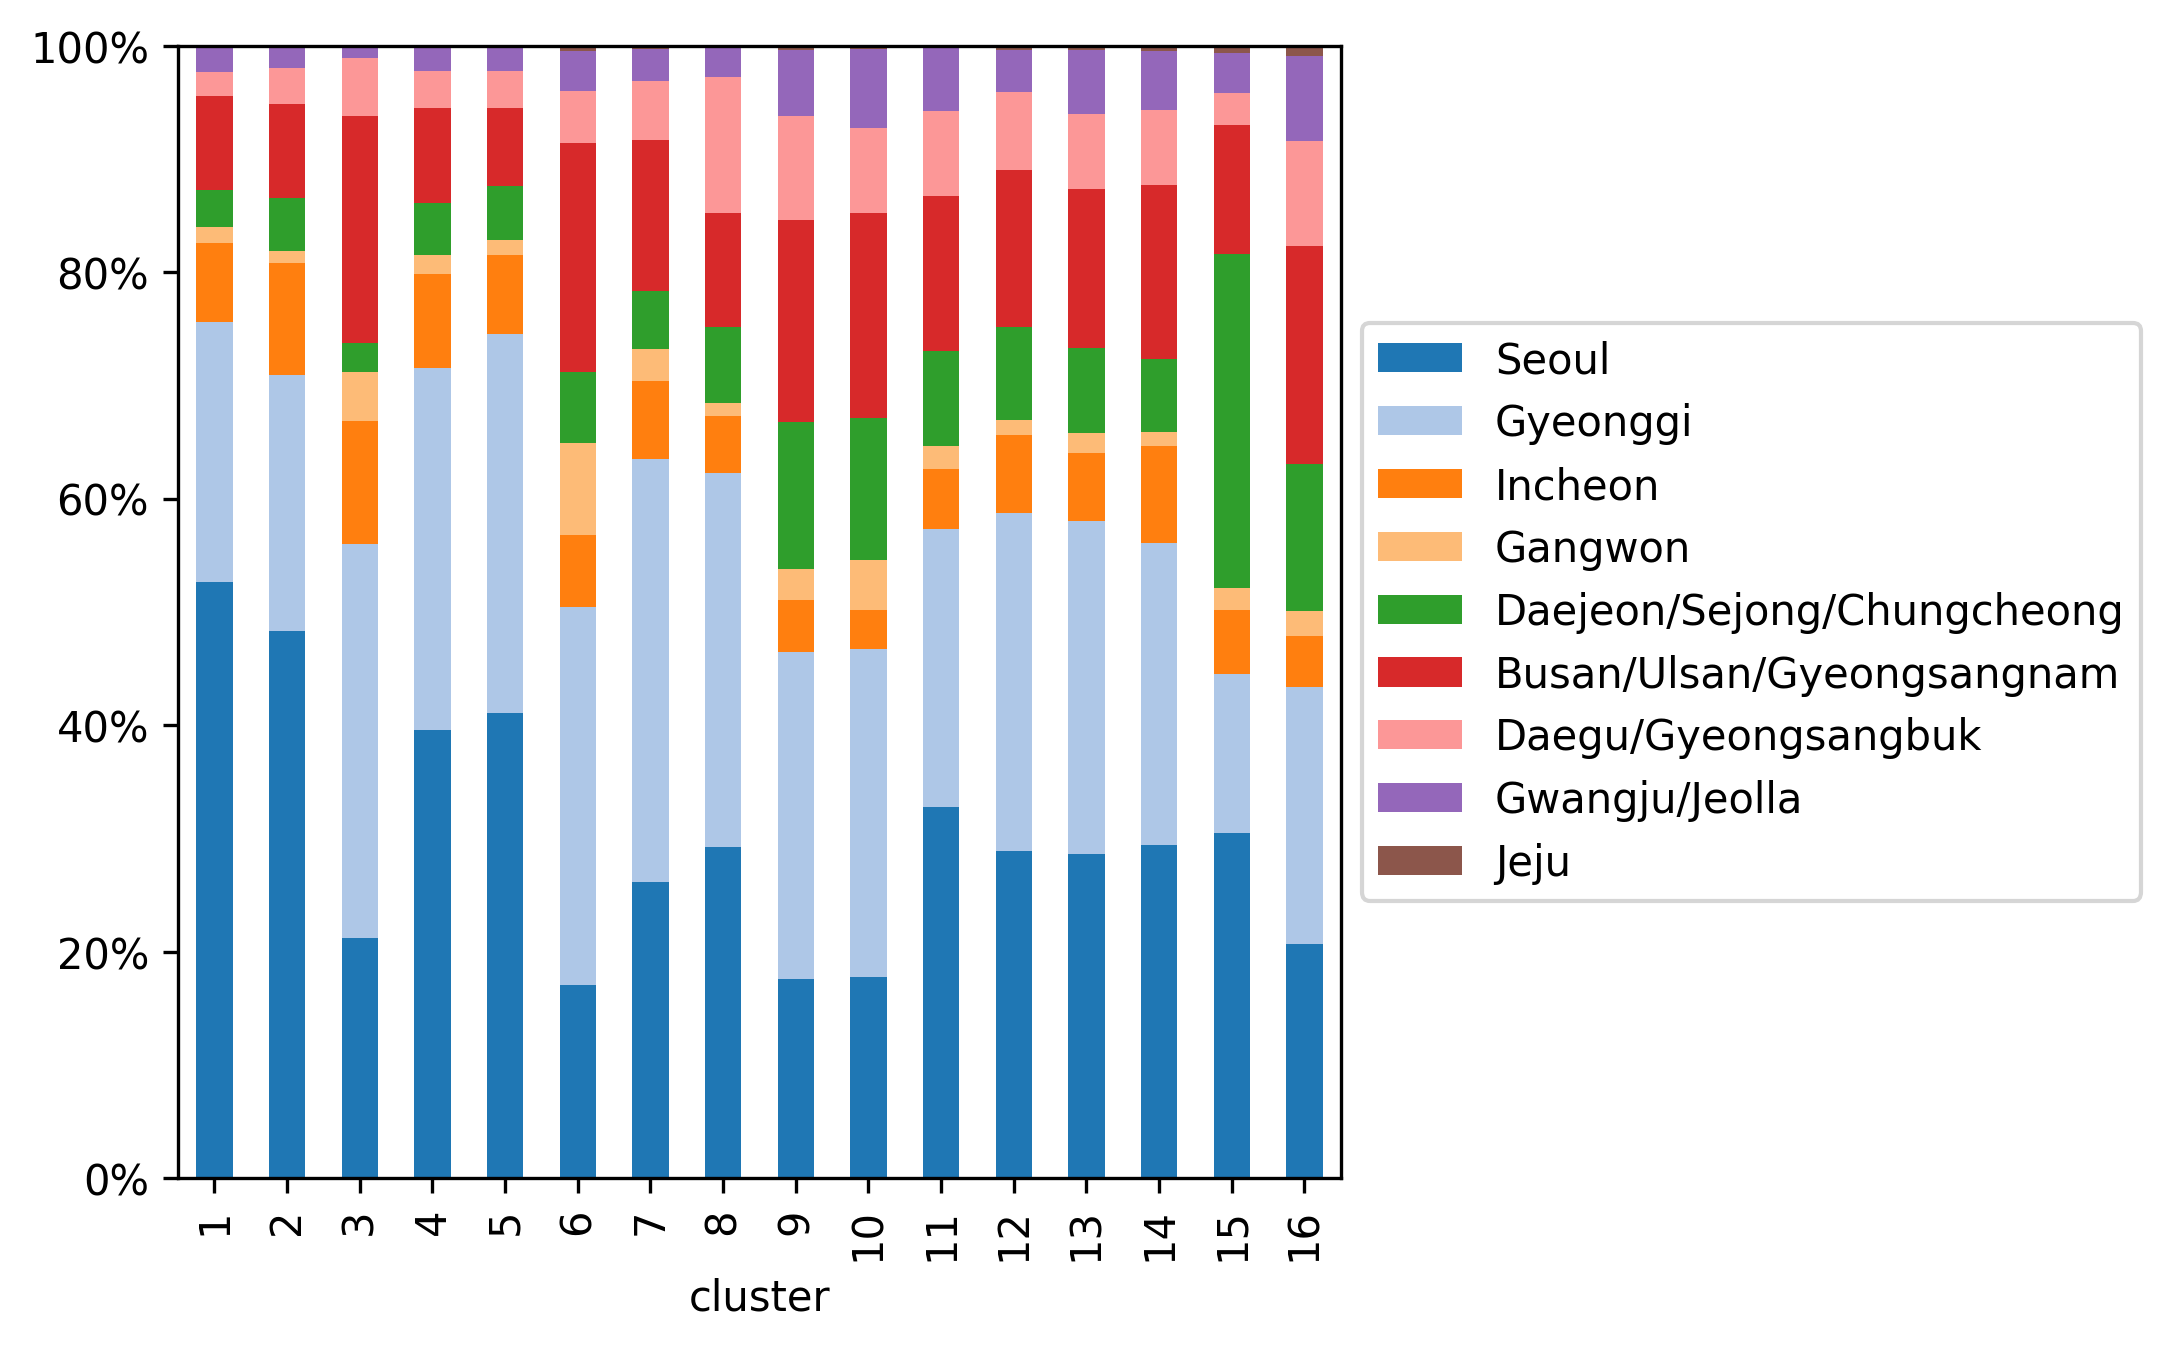

In [363]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(df_clust.cluster, df_clust.sido_cluster_code, normalize="index").plot.bar(
    stacked=True, ax=ax, cmap=tab20_sido,
).legend(
    [
        "Seoul",
        "Gyeonggi",
        "Incheon",
        "Gangwon",
        "Daejeon/Sejong/Chungcheong",
        "Busan/Ulsan/Gyeongsangnam",
        "Daegu/Gyeongsangbuk",
        "Gwangju/Jeolla",
        "Jeju",
    ],
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)

ax.set_xticks(range(n_clusters))
ax.set_xticklabels(range(1, n_clusters + 1))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_sido.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_sido.pdf", bbox_inches="tight", pad_inches=0)

In [317]:
df_clust.Area

0        134.30
1        153.80
2        170.32
3        168.42
4         35.64
          ...  
50247     14.50
50248     21.57
50249     24.86
50250     25.67
50251     25.21
Name: Area, Length: 50252, dtype: float64

In [318]:
pd.cut(df_clust.Area, [0, 50, 60, 85, np.inf])

0        (85.0, inf]
1        (85.0, inf]
2        (85.0, inf]
3        (85.0, inf]
4        (0.0, 50.0]
            ...     
50247    (0.0, 50.0]
50248    (0.0, 50.0]
50249    (0.0, 50.0]
50250    (0.0, 50.0]
50251    (0.0, 50.0]
Name: Area, Length: 50252, dtype: category
Categories (4, interval[float64]): [(0.0, 50.0] < (50.0, 60.0] < (60.0, 85.0] < (85.0, inf]]

In [319]:
pd.crosstab(
    df_clust.cluster, pd.cut(df_clust.Area, [0, 50, 60, 85, np.inf]), normalize="index"
)

Area,"(0.0, 50.0]","(50.0, 60.0]","(60.0, 85.0]","(85.0, inf]"
cluster,,,,
0,0.031350,0.072937,0.417147,0.478567
1,0.016151,0.081090,0.486541,0.416218
2,0.249582,0.260724,0.373259,0.116435
3,0.091716,0.311789,0.392126,0.204370
4,0.036364,0.186922,0.461244,0.315470
5,0.390059,0.377093,0.207455,0.025392
6,0.177248,0.432162,0.289720,0.100870
7,0.003462,0.139219,0.566271,0.291048
8,0.003429,0.129052,0.575748,0.291771


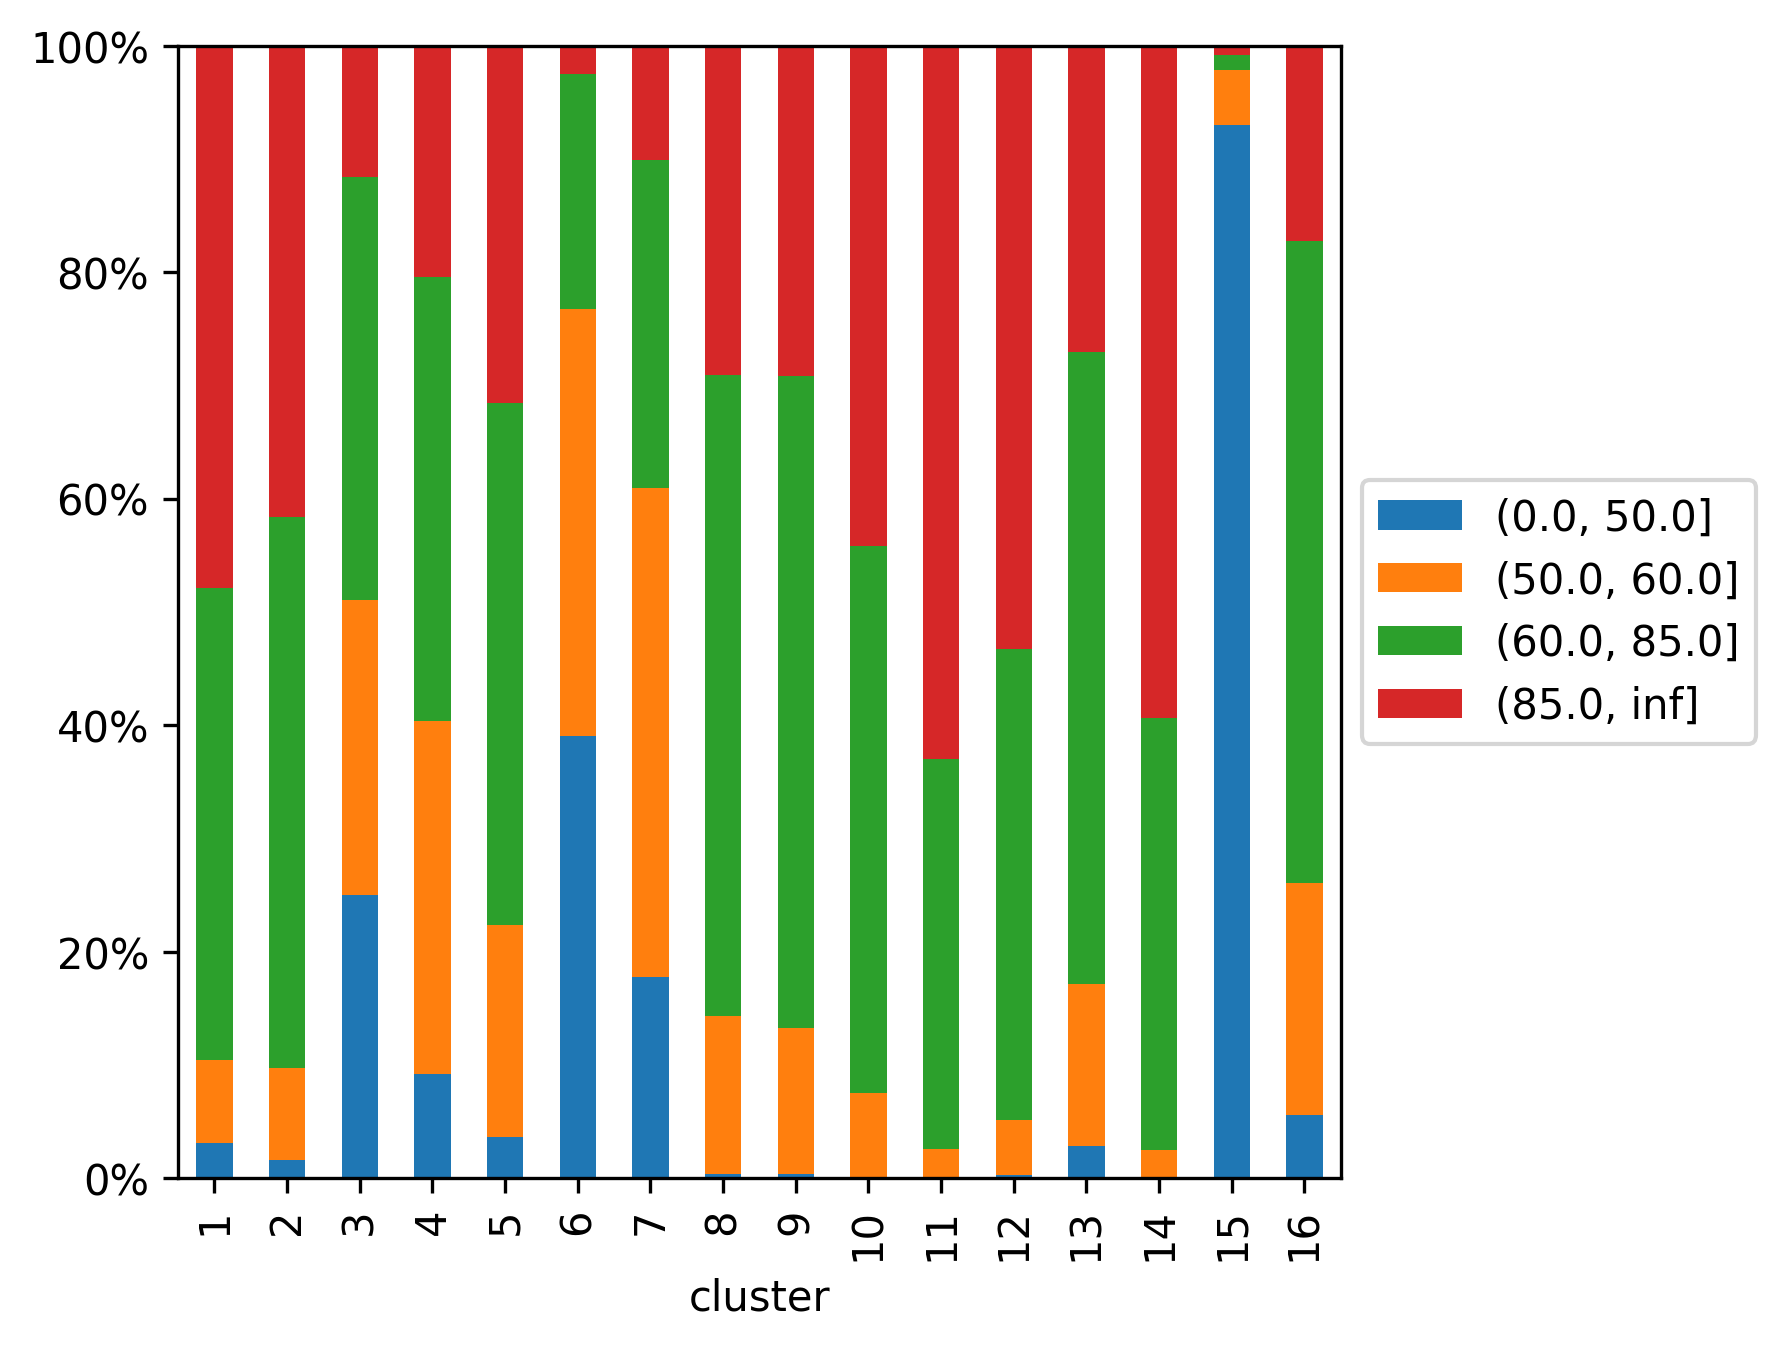

In [364]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()

pd.crosstab(
    df_clust.cluster, pd.cut(df_clust.Area, [0, 50, 60, 85, np.inf]), normalize="index"
).plot.bar(stacked=True, ax=ax).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set_xticks(range(n_clusters))
ax.set_xticklabels(range(1, n_clusters + 1))

ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1))
fig.savefig("biclust_area.png", bbox_inches="tight", pad_inches=0)
fig.savefig("biclust_area.pdf", bbox_inches="tight", pad_inches=0)

# 면적

대다수는 국민주택 규모가 가장 많다.
3, 6, 7, 15에서 소형 이하가 (< 60) 과반을 차지한다.
10, 11, 13은 대형 (85 초과) 평면이 과반이다.

몇몇 예외 말고는 면적 규모에 따른 분류가 이루어지지 않았다.
다양한 규모의 단위평면에서 나타나는 거시적인 변화를 나타낸다.

# 총평

시기별로 잘 분류함

1990년대까지의 아파트 평면은 1--7번, 2000년대는 4--14번, 2010년대는 12--16번으로 중첩되어 나타남.
하나의 평면 유형이 여러 시기에 걸쳐 나타났다가 사라지는 모습을 보여줌.

대체로 시기 구분과 관련없는 지역이나 면적 규모에 따른 차이는 잘 학습되지 않았음.

시기적으로 의미 있는 규모 변화는 잘 파악이 되었음.
15번은 원룸형 도시형생활주택 (2009년 처음 등장)을 잘 찾아냄.